# Extend the concentrated liquidity  
From the balencor paper, we have the invariance function defined as (1), where $L$ is a constant.  
\begin{equation*}
 B_x^{w_x} B_y^{w_y} = L  \tag{1} 
\end{equation*}


Let $A_i$ and $A_o$ as the amount of tokens i and o exchanged, when a user sends token i (in) to get tokens o (out).  The price of   

Out-Given-in: 

$$ A_o = B_o (1- (\frac{B_i}{B_i+A_i}))^\frac{w_i}{w_o}$$

In-Given-Out: 

$$A_i = B_i((\frac{B_o}{B_o - A_o})^\frac{w_o}{w_i} -1) $$

Spotprice:
$$SP_{i}^o = \frac{B_{i} \cdot w_o}{B_o \cdot w_{i}}$$

In-Given-Price: 

$$A_i = B_i((\frac{sp_i^{o'}}{sp_i^o})^{w_o} - 1) $$

Liquidity fingerprint: 

If follow the definition of Uniswap v3, where liquidity is defined as $ L =  \frac{\partial y}{\partial \sqrt{P}}$ and let price tick $t_i = log(P)$, the liquidity fingerprint is  

\begin{equation}
L(t_i) = 2Lw_x^{w_y}w_y^{w_x}exp( (w_x- \frac{1}{2})t_i)
\end{equation}

Concentrated liquilidy 
There is a trading function that describes the relationship between the reserves while its liquidity is in the range: 


$$ (x + x_{offset})^{w_x} (y+y_{offset})^{w_y} = L $$ 

$$ L =  \frac{\partial y}{\partial P^{w_x}} (\frac{w_x}{w_y})^{w_x} $$  

or equivalently by switch symbol x and y (and take price reciprocal) 
$$ L =  \frac{\partial x}{\partial P^{-w_y}} (\frac{w_y}{w_x})^{w_y} $$ 


For a price range $[p_a, p_b]$  (price is price of x interms of y) and let tick $t_i = log(P)$ 

$$ y_{offset} = L \cdot exp(w_x t_i) (\frac{w_y}{w_x})^{w_x} $$ 

$$ x_{offset} = L \cdot exp(-w_y t_i) (\frac{w_x}{w_y})^{w_y} $$ 




### Prove of Liquidity fingerprint:

Start with the invariant trading function: 

$$ x^{w_x} \cdot y^{w_y} = L$$ 
Solving for y: 
$$ y = (\frac{L}{x^{w_x}})^{\frac{1}{w_y}}$$
Given the sport price P (price of x as of y):
$$ P = \frac{y\cdot w_x}{x \cdot w_y} $$
We can rewrite P as 
$$ P = (\frac{L}{x})^\frac{1}{w_y}\cdot \frac{w_x}{w_y}$$

To find the same price, but as a function of y rather than x, we can swithing x and y and taking the reciprocal: 
$$ P_y = (\frac{y}{L})^\frac{1}{w_x} \cdot \frac{w_x}{w_y}$$

Solving Y: 
$$y = L \cdot P^{w_x} (\frac{w_y}{w_x})^{w_x} \tag{2}$$ 

If following the definition in Uniswap v3, where liquidity is defined as $ L =  \frac{\partial y}{\partial \sqrt{P}}$ and let price tick $t_i = log(P)$, the liquidity fingerprint is  

\begin{equation}
L(t_i) = 2Lw_x^{w_y}w_y^{w_x}exp((w_x- \frac{1}{2})t_i)
\end{equation}


In stead of define liquidy fingerprint as$\frac{\partial y}{\partial \sqrt{P}} $ a special case when $w_x = \frac{1}{2}$, we re-define the it as 
$$ \frac{\partial y}{\partial P^{w_x}} = L \cdot (\frac{w_y}{w_x})^{w_x} $$  It indicates that liquidity is constant for every price tick chage in unit of $w_ilog(P)$. 

To calculate the concentrated liquity boundary, we take the derivative w.r.t $P^{w_x}$: 
$$ \frac{\partial y}{\partial P^{w_x}} = L \cdot (\frac{w_y}{w_x})^{w_x} $$

For a price range $[p_a, p_b]$  (price is price of x interms of y), and let price tick $t_i = log(P)$, 
$$ \Delta y =  \Delta P^{w_x} L\cdot \frac{w_y}{w_x}^{w_x}$$ 
 
$$ y_{offset} = L \cdot exp(w_x t_i) (\frac{w_y}{w_x})^{w_x} $$ 

$$ x_{offset} = L \cdot exp(-w_y t_i) (\frac{w_x}{w_y})^{w_y} $$ 



In [ ]:
# Illustrations 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


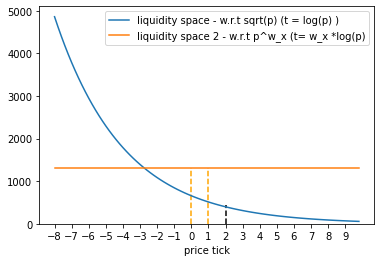

In [54]:
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import random
import pandas as pd 

#Liquity fingerprint 
w_x=0.25
w_y= 1-w_x
t =  np.array(list(range(-40,50)))/5
p = np.exp(t)
L = 1000

lt = L*2*w_x**w_y*w_y**w_x*np.exp((w_x - 0.5)*t)  # w.r.t sqrt(P)
#lt1 = L * (w_y/w_x)**w_x * w_x* np.exp(-w_y*t)    # w.r.t P 
lt2 = L * (w_y/w_x)**w_x   # w.r. t p^w_x

fig, ax = plt.subplots()
#sns.lineplot(t,lt1, label="liquidity space - w.r.t p",)
sns.lineplot(t,lt, label="liquidity space - w.r.t sqrt(p) (t = log(p) ) ",)
sns.lineplot(t,lt2, label="liquidity space 2 - w.r.t p^w_x (t= w_x *log(p)",)
ax.set_xticks(range(-10,10))
ax.vlines(x = [0,1], ymin = [0, 0], ymax = [lt2, lt2], linestyle='--', color = 'orange')
ax.vlines(x = 2, ymin=0, ymax= 441, linestyle='--')
ax.set_ylim(0,)
ax.set_xlabel('price tick')
plt.show()


the virtual reserve of x is 260.84743001221455
the virtual reserve of y is 782.5422900366436


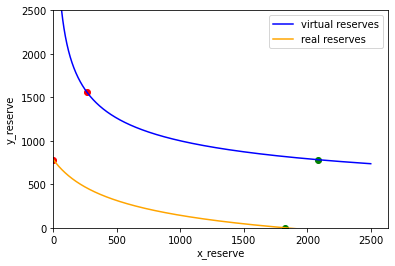

In [56]:
x = np.array(list(range(1,2500)))
w_x = 0.25 
w_y = 1-w_x 

L = 1000
y = (L/(x**w_x))**(1/w_y)

# suppose set price range [pa, pb] = [0.1 2], then ti = -/+ 0.69
pa = 0.5
pb = 2

y_offset = L*np.exp(w_y*np.log(pa))*(w_y/w_x)**(w_x)

x_offset = L*np.exp(-w_y*np.log(pb))*(w_x/w_y)**(w_y)

print("the virtual reserve of x is {}".format(x_offset))
print("the virtual reserve of y is {}".format(y_offset))

x_tilta = x - x_offset
y_tilta = (L/x**w_x)**(1/w_y) - y_offset 

df = pd.DataFrame({'x_reserve':x, 'y_reserve':y, 'x_offset': x_tilta, 'y_offset': y_tilta})
ya = y_offset
xa = (L/(ya**w_y))**(1/w_x)

xb = x_offset
yb = (L/(xb**w_x))**(1/w_y)

fig, ax = plt.subplots()
sns.lineplot(data=df, x='x_reserve', y='y_reserve', color = 'blue', label= 'virtual reserves')
sns.lineplot(data=df, x='x_offset', y='y_offset', color= 'orange', label= 'real reserves')
plt.scatter(x=xb, y=yb, color='r', label = 'Pb')
plt.scatter(x=xa, y=ya, color='g', label = 'Pa')

plt.scatter(x=xa-x_offset, y=ya-y_offset, color='g', label = 'Pa')
plt.scatter(x=xb-x_offset, y=yb-y_offset, color='r', label = 'Pa')

ax.set_xlim(0,)
ax.set_ylim(0, 2500)
plt.show()

# New Section